# Optimal combination with `t2smap`

Use `t2smap` {cite:p}`DuPre2021` to combine data.

In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
from nilearn import image, plotting
from repo2data.repo2data import Repo2Data
from tedana import workflows

# Install the data if running locally, or point to cached data if running on neurolibre
DATA_REQ_FILE = os.path.join("../binder/data_requirement.json")

# Download data
repo2data = Repo2Data(DATA_REQ_FILE)
data_path = repo2data.install()
data_path = os.path.abspath(os.path.join(data_path[0], "data"))

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)
Module `duecredit` not successfully imported due to "No module named 'duecredit'". Package functionality unaffected.


Failed to import duecredit due to No module named 'duecredit'


---- repo2data starting ----
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/repo2data
Config from file :
../binder/data_requirement.json
Destination:
./../data/multi-echo-data-analysis

Info : ./../data/multi-echo-data-analysis already downloaded


In [2]:
func_dir = os.path.join(data_path, "sub-04570/func/")
data_files = [
    os.path.join(
        func_dir,
        "sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz",
    ),
    os.path.join(
        func_dir,
        "sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz",
    ),
    os.path.join(
        func_dir,
        "sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz",
    ),
    os.path.join(
        func_dir,
        "sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz",
    ),
]
echo_times = [12.0, 28.0, 44.0, 60.0]
mask_file = os.path.join(
    func_dir, "sub-04570_task-rest_space-scanner_desc-brain_mask.nii.gz"
)
confounds_file = os.path.join(
    func_dir, "sub-04570_task-rest_desc-confounds_timeseries.tsv"
)

out_dir = os.path.join(data_path, "t2smap")

In [3]:
workflows.t2smap_workflow(
    data_files,
    echo_times,
    out_dir=out_dir,
    mask=mask_file,
    prefix="sub-04570_task-rest_space-scanner",
    fittype="curvefit",
)

INFO     t2smap:t2smap_workflow:229 Using output directory: /home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/t2smap


INFO     t2smap:t2smap_workflow:239 Loading input data: ['/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-1_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-2_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-3_space-scanner_desc-partialPreproc_bold.nii.gz', '/home/runner/work/multi-echo-data-analysis/multi-echo-data-analysis/data/multi-echo-data-analysis/data/sub-04570/func/sub-04570_task-rest_echo-4_space-scanner_desc-partialPreproc_bold.nii.gz']


INFO     t2smap:t2smap_workflow:255 Using user-defined mask


INFO     t2smap:t2smap_workflow:258 Computing adaptive T2* map


INFO     t2smap:t2smap_workflow:275 Computing optimal combination


INFO     combine:make_optcom:242 Optimally combining data with voxel-wise T2* estimates


INFO     t2smap:t2smap_workflow:320 Workflow completed


In [4]:
out_files = sorted(glob(os.path.join(out_dir, "*")))
out_files = [os.path.basename(f) for f in out_files]
print("\n".join(out_files))

sub-04570_task-rest_space-scanner_S0map.nii.gz
sub-04570_task-rest_space-scanner_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_dataset_description.json
sub-04570_task-rest_space-scanner_desc-limited_S0map.nii.gz
sub-04570_task-rest_space-scanner_desc-limited_T2starmap.nii.gz
sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz


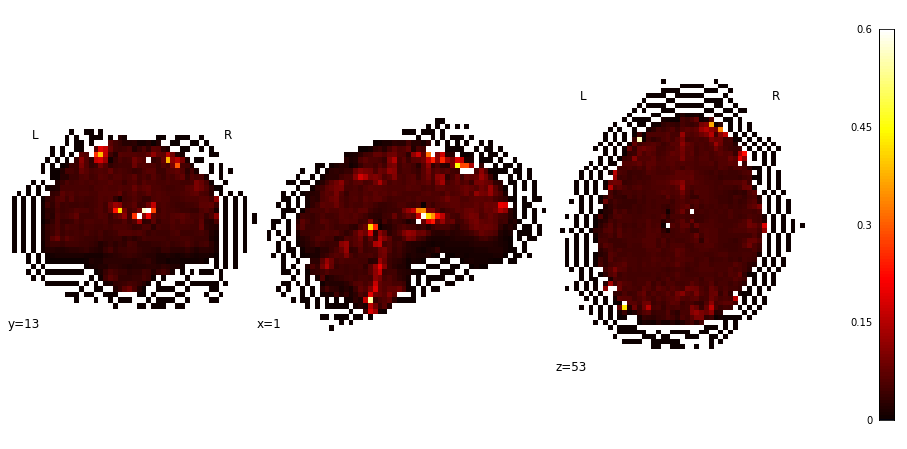

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_stat_map(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_T2starmap.nii.gz"),
    vmax=0.6,
    draw_cross=False,
    bg_img=None,
    figure=fig,
    axes=ax,
)
glue("figure_t2starmap", fig, display=False)

```{glue:figure} figure_t2starmap
:name: "figure_t2starmap"
:align: center

T2* map estimated from multi-echo data using tedana's {py:func}`~tedana.workflows.t2smap_workflow`.
```

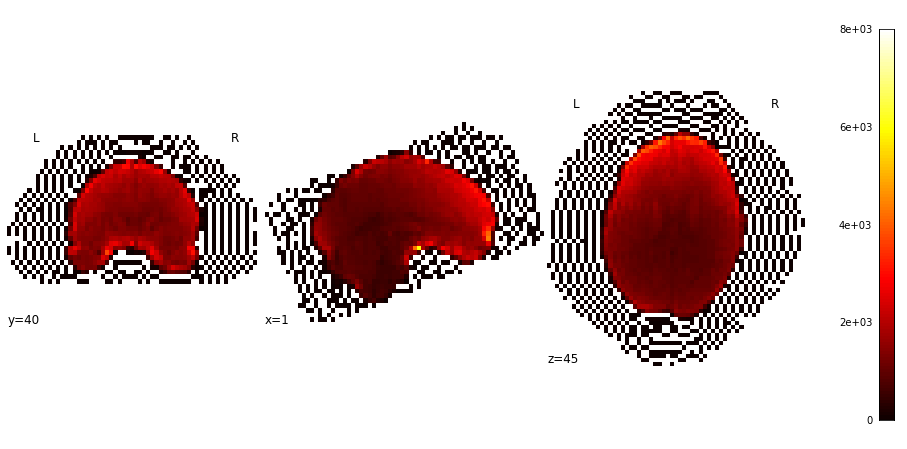

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_stat_map(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_S0map.nii.gz"),
    vmax=8000,
    draw_cross=False,
    bg_img=None,
    figure=fig,
    axes=ax,
)
glue("figure_s0map", fig, display=False)

```{glue:figure} figure_s0map
:name: "figure_s0map"
:align: center

S0 map estimated from multi-echo data using tedana's {py:func}`~tedana.workflows.t2smap_workflow`.
```

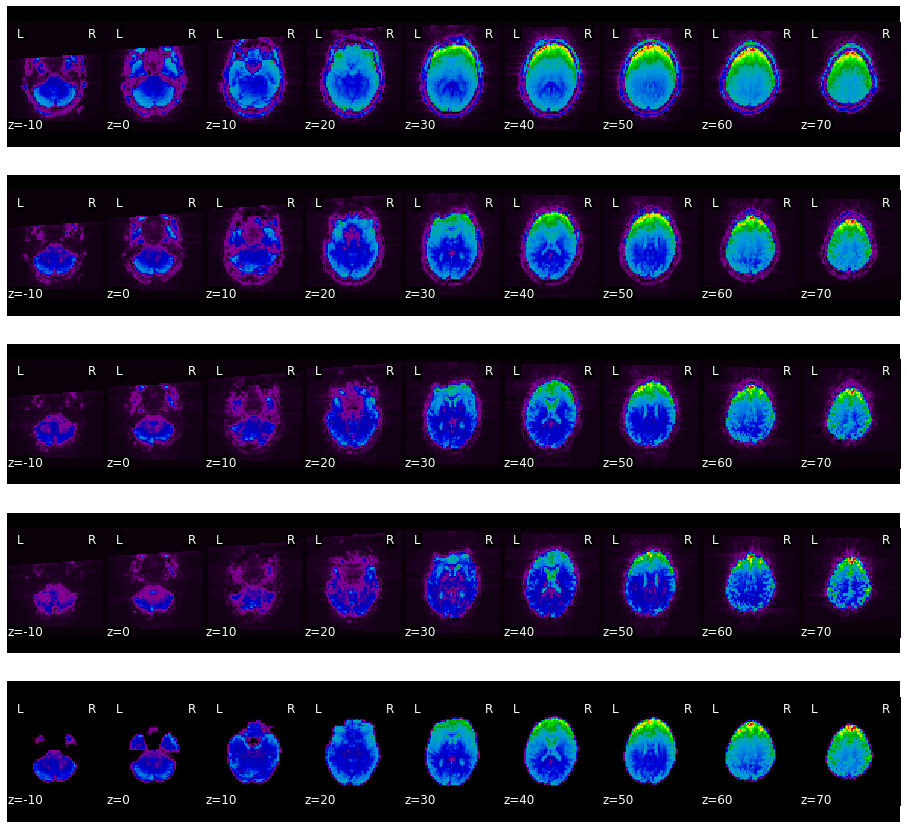

In [7]:
fig, axes = plt.subplots(figsize=(16, 15), nrows=5)
plotting.plot_epi(
    image.mean_img(data_files[0]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    figure=fig,
    axes=axes[0],
)
plotting.plot_epi(
    image.mean_img(data_files[1]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    figure=fig,
    axes=axes[1],
)
plotting.plot_epi(
    image.mean_img(data_files[2]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    figure=fig,
    axes=axes[2],
)
plotting.plot_epi(
    image.mean_img(data_files[3]),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    figure=fig,
    axes=axes[3],
)
plotting.plot_epi(
    image.mean_img(
        os.path.join(
            out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"
        )
    ),
    draw_cross=False,
    bg_img=None,
    cut_coords=[-10, 0, 10, 20, 30, 40, 50, 60, 70],
    display_mode="z",
    figure=fig,
    axes=axes[4],
)
glue("figure_t2smap_epi_plots", fig, display=False)

```{glue:figure} figure_t2smap_epi_plots
:name: "figure_t2smap_epi_plots"
:align: center

Mean map of each of the echoes in the original data, along with the mean map of the optimally combined data.
```

<string>:1: RuntimeWarning: invalid value encountered in true_divide


/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


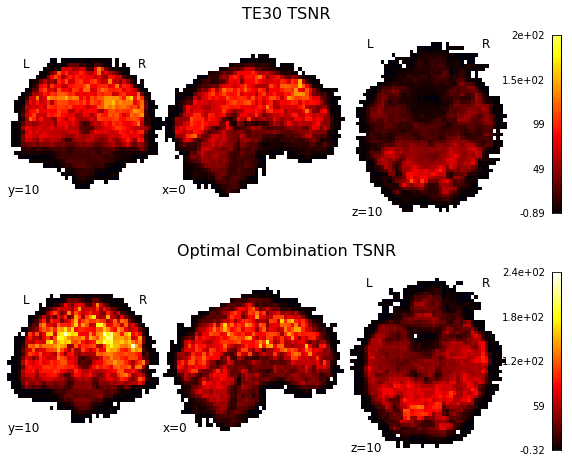

In [8]:
te30_tsnr = image.math_img(
    "(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask",
    img=data_files[1],
    mask=mask_file,
)
oc_tsnr = image.math_img(
    "(np.nanmean(img, axis=3) / np.nanstd(img, axis=3)) * mask",
    img=os.path.join(
        out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"
    ),
    mask=mask_file,
)
vmax = np.nanmax(np.abs(oc_tsnr.get_fdata()))

fig, axes = plt.subplots(figsize=(10, 8), nrows=2)
plotting.plot_stat_map(
    te30_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    figure=fig,
    axes=axes[0],
)
axes[0].set_title("TE30 TSNR", fontsize=16)
plotting.plot_stat_map(
    oc_tsnr,
    draw_cross=False,
    bg_img=None,
    threshold=0.1,
    cut_coords=[0, 10, 10],
    vmax=vmax,
    symmetric_cbar=False,
    figure=fig,
    axes=axes[1],
)
axes[1].set_title("Optimal Combination TSNR", fontsize=16)
glue("figure_t2smap_t2snr", fig, display=False)

```{glue:figure} figure_t2smap_t2snr
:name: "figure_t2smap_t2snr"
:align: center

TSNR map of each of the echoes in the original data, along with the TSNR map of the optimally combined data.
```

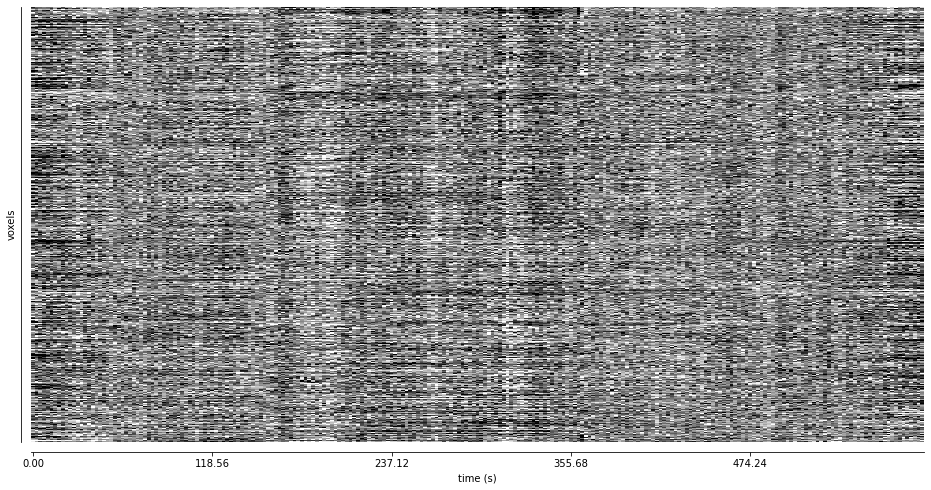

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    data_files[1],
    figure=fig,
    axes=ax,
)
glue("figure_echo2_carpet", fig, display=False)

```{glue:figure} figure_echo2_carpet
:name: "figure_echo2_carpet"
:align: center

Carpet plot of the second echo's data.
```

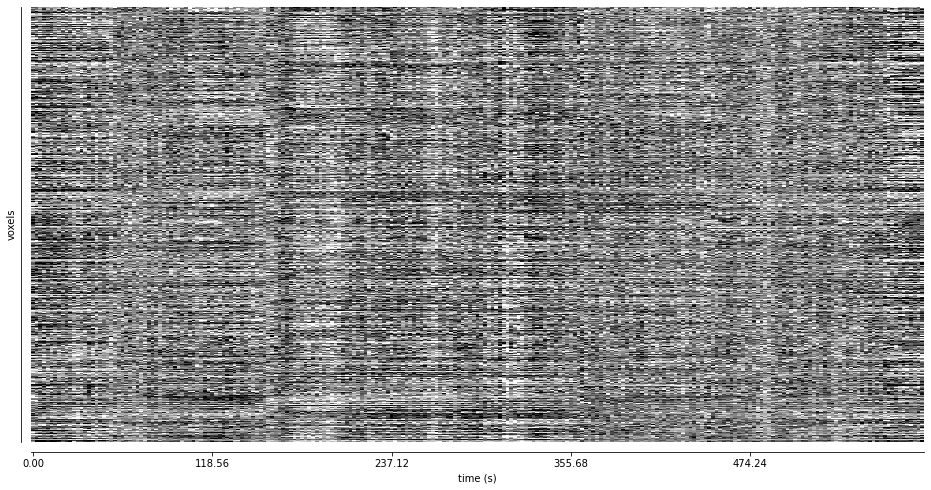

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
plotting.plot_carpet(
    os.path.join(out_dir, "sub-04570_task-rest_space-scanner_desc-optcom_bold.nii.gz"),
    axes=ax,
)
glue("figure_optcom_carpet", fig, display=False)

```{glue:figure} figure_optcom_carpet
:name: "figure_optcom_carpet"
:align: center

Carpet plot of the optimally combined data.
```